In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
def create_entanglement(qc):
    qc.x(2)
    qc.h(1)
    qc.cx(1, 2)

In [4]:
def prepare_teleportation_qubit(qc, input_state):
    qc.initialize(input_state, 0)

In [5]:
def perform_bell_measurement(qc):
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

In [6]:
def apply_gates_based_on_measurement(qc):
    qc.x(1)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.measure(2, 2)

In [8]:
def teleportation(input_state):
    qc = QuantumCircuit(3, 3)

    create_entanglement(qc)
    prepare_teleportation_qubit(qc, input_state)
    perform_bell_measurement(qc)
    apply_gates_based_on_measurement(qc)

    print("Quantum Circuit:")
    display(qc.draw(output='mpl'))

    simulator = Aer.get_backend('qasm_simulator')
    counts = execute(qc, simulator).result().get_counts()


    print("\nMeasurement Results:")
    print(counts)

    display(plot_histogram(counts))

Quantum Circuit:


C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


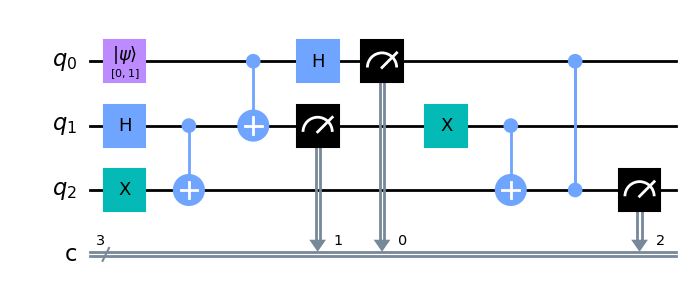


Measurement Results:
{'111': 264, '101': 261, '100': 247, '110': 252}


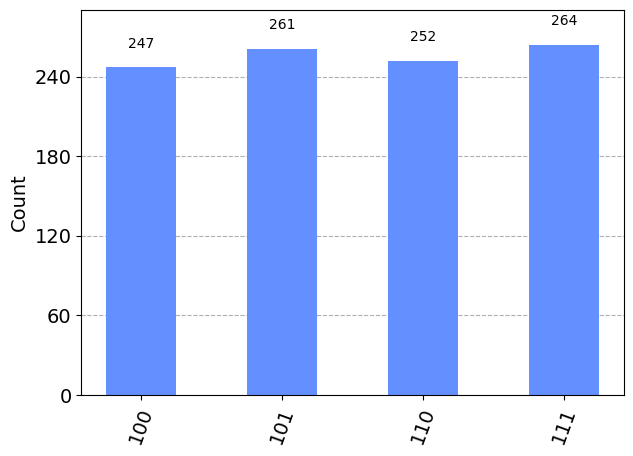

In [9]:
initial_state_to_teleport = [0, 1]  
teleportation(initial_state_to_teleport)